In [ ]:
!wget https://archive.org/download/stackexchange/stackoverflow.com-Users.7z

In [ ]:
!7z x -y stackoverflow.com-Users.7z

In [9]:
import pandas as pd 
import xml.etree.ElementTree as etree

In [17]:
columns = ["Id", "Reputation", "CreationDate", "Views", "UpVotes", "DownVotes"]
users = []

In [ ]:
with open("Users.xml") as file:
  for line in file:
    if "<?xml" in line or "<users>" in line:
      continue
    node = etree.fromstring(line)
    attributes = []
    
    for col in columns:
        attributes.append(node.attrib.get(col))
    users.append(attributes)
    print("CreationDate: " + attributes[2])
    

In [43]:
dataframe = pd.DataFrame(users, columns=columns)

In [44]:
dataframe["Reputation"] = pd.to_numeric(dataframe["Reputation"])
dataframe["CreationDate"] = pd.to_datetime(dataframe["CreationDate"])
dataframe["Views"] = pd.to_numeric(dataframe["Views"])
dataframe["UpVotes"] = pd.to_numeric(dataframe["Views"])
dataframe["DownVotes"] = pd.to_numeric(dataframe["Views"])

In [45]:
dataframe.dtypes

Id                      object
Reputation               int64
CreationDate    datetime64[ns]
Views                    int64
UpVotes                  int64
DownVotes                int64
dtype: object

In [67]:
dataframe["Reputation"].min()

1

In [68]:
dataframe["Reputation"].max()

1185733

In [69]:
dataframe["Reputation"].mean()

119.63363706738122

In [70]:
dataframe["Reputation"].median()

1.0

In [71]:
dataframe["Reputation"].mode()

0    1
dtype: int64

In [72]:
dataframe["Reputation"].std()

2407.321750602207

In [58]:
dataframe.to_csv("saida.csv")

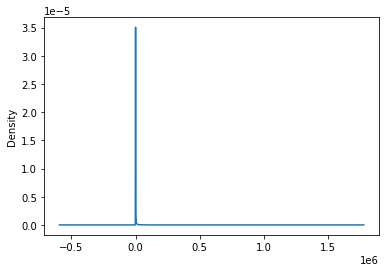

In [74]:
dataframe["Reputation"].plot.kde()

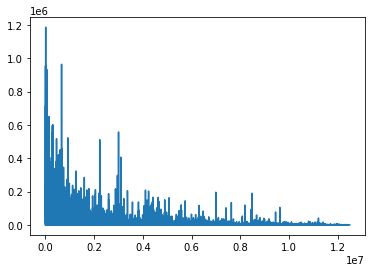

In [75]:
dataframe["Reputation"].plot()